In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
fake_transaction = pd.read_csv('simulated_transaction_2024.csv')

In [11]:
fake_transaction

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face
...,...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon


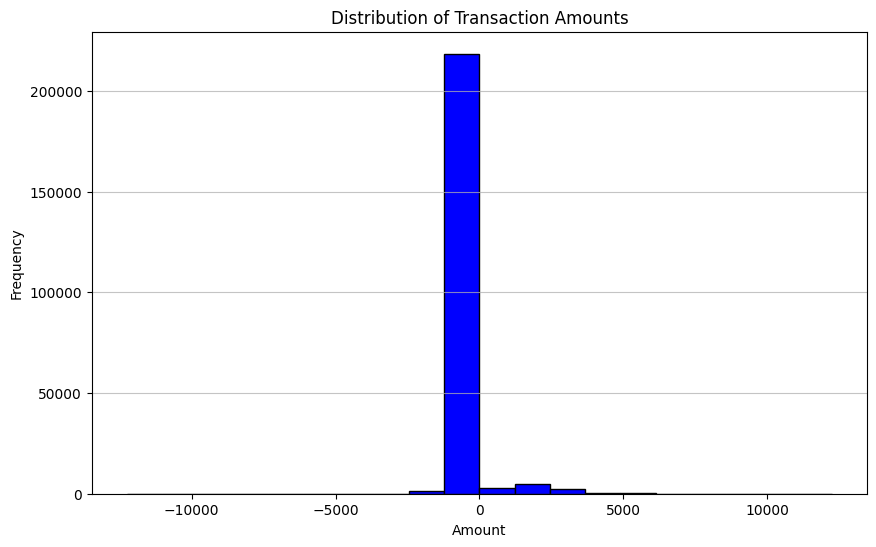

In [12]:
plt.figure(figsize=(10,6))
fake_transaction['Amount'].plot(kind='hist', bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

In [13]:
fake_transaction.columns

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name'],
      dtype='object')

In [14]:
fake_transaction = fake_transaction[['Date', 'Timestamp', 'Account No', 'Balance', 'Amount', 'Third Party Name']]

In [15]:
fake_transaction

,Date,Timestamp,Account No,Balance,Amount,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,NaN
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,Fat Face
...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,Amazon


In [16]:
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              230367 non-null  object 
 1   Timestamp         230345 non-null  object 
 2   Account No        230372 non-null  float64
 3   Balance           230350 non-null  float64
 4   Amount            230387 non-null  float64
 5   Third Party Name  223517 non-null  object 
dtypes: float64(3), object(3)
memory usage: 10.6+ MB


In [17]:
fake_transaction.isnull().sum()

Date                 229
Timestamp            251
Account No           224
Balance              246
Amount               209
Third Party Name    7079
dtype: int64

# Impute Date and Timestamp colummns

In [18]:
fake_transaction['Timestamp_delta'] = pd.to_timedelta(fake_transaction['Timestamp'] + ':00')

fake_transaction['Date_forward'] = fake_transaction['Date'].ffill()
fake_transaction['Date_backward'] = fake_transaction['Date'].bfill()
fake_transaction['Timestamp_forward'] = fake_transaction['Timestamp_delta'].ffill()

fake_transaction['prev_timestamp'] = fake_transaction['Timestamp_delta'].shift(1)
fake_transaction['next_timestamp'] = fake_transaction['Timestamp_delta'].shift(-1)
fake_transaction['prev_date'] = fake_transaction['Date'].shift(1)
fake_transaction['next_date'] = fake_transaction['Date'].shift(-1)

for i in range(len(fake_transaction)):
    if pd.isnull(fake_transaction.loc[i, 'Date']):
        if fake_transaction.loc[i, 'Date_forward'] == fake_transaction.loc[i, 'Date_backward']:
            fake_transaction.loc[i, 'Date'] = fake_transaction.loc[i, 'Date_forward']
        else:
            if fake_transaction.loc[i, 'Timestamp_delta'] >= fake_transaction.loc[i, 'prev_timestamp']: # 23:08 & 23:14, still same day
                fake_transaction.loc[i, 'Date'] = fake_transaction.loc[i, 'prev_date']
            else:
                fake_transaction.loc[i, 'Date'] = fake_transaction.loc[i, 'next_date']  # 23:08 & 00:14, start a new day

for i in range(len(fake_transaction)):
    if pd.isnull(fake_transaction.loc[i, 'Timestamp']):
        if fake_transaction.loc[i, 'Date'] == fake_transaction.loc[i, 'prev_date']:
            fake_transaction.loc[i, 'Timestamp'] = fake_transaction.loc[i-1, 'Timestamp']
        else:
            fake_transaction.loc[i, 'Timestamp'] = fake_transaction.loc[i+1, 'Timestamp']


fake_transaction.drop(['Timestamp_delta', 'Date_forward', 'Date_backward', 'Timestamp_forward', 'prev_timestamp', 'next_timestamp', 'prev_date', 'next_date'], axis=1, inplace=True)
fake_transaction.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,Fat Face


In [19]:
fake_transaction.dropna(subset=['Third Party Name'], inplace=True)

In [20]:
# combine Data and Timestamp
from datetime import datetime

fake_transaction['DateTime'] = pd.to_datetime(fake_transaction['Date'] + ' ' + fake_transaction['Timestamp'], format='%d/%m/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M')
fake_transaction = fake_transaction.drop(['Date', 'Timestamp'], axis=1)


In [21]:
fake_transaction.isnull().sum()

Account No          220
Balance             240
Amount              200
Third Party Name      0
DateTime              0
dtype: int64

In [22]:
fake_transaction.head()

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.00,1584.00,Westport Care Home,2023-01-01 00:00
1,472213568.0,3792.00,1950.00,Barbiee Boutique,2023-01-01 00:00
4,624500124.0,3226.00,1825.00,Fat Face,2023-01-01 00:00
5,203466392.0,4607.66,2841.66,Lavender Primary,2023-01-01 00:00
6,768271776.0,3620.00,1950.00,A Cut Above,2023-01-01 00:00


# Impute the Amount column

In [23]:
# fake_transaction.to_csv('fake_transaction_new.csv', index=False)

In [24]:
fake_transaction

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00
4,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00
5,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00
6,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00
...,...,...,...,...,...
230591,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54
230592,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55
230593,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05
230594,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13


In [25]:
# cal average 'Amount' for each 'Account No' and 'Third Party Name'
group_means = fake_transaction.groupby(['Account No', 'Third Party Name'])['Amount'].mean().reset_index(name='Mean Amount')
# group_means.head()

# merge mean into fake_transaction
data_with_means = pd.merge(fake_transaction, group_means, on=['Account No', 'Third Party Name'], how='left')
# data_with_means.head()

# impute missing value in 'Amount' with 'Mean Amount'
data_with_means['Amount'] = data_with_means.apply(lambda row: row['Mean Amount'] if pd.isnull(row['Amount']) else row['Amount'], axis=1)

# delete 'Mean Amount' because it is used to impute missing value
fake_transaction = data_with_means.drop(columns=['Mean Amount'])

# check the number of missing value again
new_missing_values = fake_transaction.isnull().sum()

print(new_missing_values)


Account No          220
Balance             240
Amount                1
Third Party Name      0
DateTime              0
dtype: int64


In [26]:
fake_transaction

,Account No,Balance,Amount,Third Party Name,DateTime
0,678330503.0,2971.000000,1584.00,Westport Care Home,2023-01-01 00:00
1,472213568.0,3792.000000,1950.00,Barbiee Boutique,2023-01-01 00:00
2,624500124.0,3226.000000,1825.00,Fat Face,2023-01-01 00:00
3,203466392.0,4607.660000,2841.66,Lavender Primary,2023-01-01 00:00
4,768271776.0,3620.000000,1950.00,A Cut Above,2023-01-01 00:00
...,...,...,...,...,...
223512,581655972.0,45935.206861,-41.06,Tesco,2023-12-06 20:54
223513,786141370.0,-244.837500,-62.35,Sainsbury Local,2023-12-06 20:55
223514,824916823.0,9709.172159,-32.94,Deliveroo,2023-12-06 21:05
223515,366550080.0,26834.165794,-19.25,Amazon,2023-12-06 21:13


In [27]:
# find 'Amount' == NaN
missing_amount_rows = fake_transaction[fake_transaction['Amount'].isnull()]

print(missing_amount_rows)


        Account No     Balance  Amount Third Party Name          DateTime
33664  859264768.0  403.097292     NaN              CeX  2023-02-18 09:41


# Impute Balance column

In [28]:
data_sorted = fake_transaction.sort_values(by=['Account No', 'DateTime'])
data_filled = data_sorted.copy()

for i in range(1, len(data_filled)):
    # check NaN
    if pd.isnull(data_filled.iloc[i]['Balance']):
        # get previous balance and amount from the current row
        prev_balance = data_filled.iloc[i-1]['Balance']
        amount = data_filled.iloc[i]['Amount']
        # cal  new balance and update it in the dataframe
        new_balance = prev_balance - amount if not pd.isnull(prev_balance) and not pd.isnull(amount) else None
        data_filled.at[data_filled.index[i], 'Balance'] = new_balance

data_filled[pd.isnull(data_sorted['Balance'])]


,Account No,Balance,Amount,Third Party Name,DateTime
201104,108812033.0,898.066250,-67.55,Tesco,2023-11-05 12:38
54508,108931112.0,4193.832350,-3.98,Cass Art,2023-03-30 15:01
222686,117273481.0,10975.895243,-6.15,Starbucks,2023-12-05 09:17
111011,119943495.0,-626.608312,-7.99,Disney,2023-06-30 23:59
51651,121858569.0,1896.947600,-139.97,Reebok,2023-03-21 17:53
...,...,...,...,...,...
182216,987163717.0,6452.448480,-36.65,JustEat,2023-10-11 06:42
41339,987656636.0,4305.432393,-7.99,Disney,2023-02-28 23:59
126016,987656636.0,5733.327302,-20.69,Selfridges,2023-07-24 05:13
86878,995615876.0,1133.336138,-35.47,Tesco,2023-05-22 09:56


In [29]:
# find 'Balance' == NaN
missing_balance_rows = data_filled[data_filled['Balance'].isnull()]

print(missing_balance_rows)

Empty DataFrame
Columns: [Account No, Balance, Amount, Third Party Name, DateTime]
Index: []


In [30]:
fake_transaction = data_filled
fake_transaction

,Account No,Balance,Amount,Third Party Name,DateTime
712,101531259.0,124.000000,-859.00,LBG,2023-01-01 00:00
3832,101531259.0,116.010000,-7.99,Disney,2023-01-01 00:00
3833,101531259.0,16.010000,-100.00,Grand Union BJJ,2023-01-01 00:00
4539,101531259.0,-63.990000,-80.00,Matalan,2023-01-01 09:37
4929,101531259.0,-247.990000,-184.00,Matalan,2023-01-01 12:00
...,...,...,...,...,...
216608,NaN,11517.049529,-15.99,Netflix,2023-11-30 23:59
219300,NaN,-1692.102105,-15.99,Netflix,2023-11-30 23:59
215679,NaN,-731.036300,-1226.00,Halifax,2023-12-01 00:00
222041,NaN,2619.340104,-225.37,Topshop,2023-12-04 10:03


In [31]:
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223517 entries, 712 to 223282
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account No        223297 non-null  float64
 1   Balance           223517 non-null  float64
 2   Amount            223516 non-null  float64
 3   Third Party Name  223517 non-null  object 
 4   DateTime          223517 non-null  object 
dtypes: float64(3), object(2)
memory usage: 18.3+ MB


In [32]:
# calculate frequency in each account in each year
fake_transaction['DateTime'] = pd.to_datetime(fake_transaction['DateTime'])
fake_transaction['Year'] = fake_transaction['DateTime'].dt.year
transaction_counts_by_year = fake_transaction.groupby(['Account No', 'Year']).size().reset_index(name='Transaction Count')

# merge 'Transaction Count' into fake_transaction
fake_transaction = pd.merge(fake_transaction, transaction_counts_by_year, on=['Account No', 'Year'], how='left')

average_transaction_count_by_year = fake_transaction.groupby(['Account No', 'Year'])['Transaction Count'].mean().reset_index(name='Average Transaction Count Per Year')

# merge into fake_transaction
fake_transaction = pd.merge(fake_transaction, transaction_counts_by_year, on=['Account No', 'Year'], how='left', suffixes=('', '_drop'))

# group each Transaction Count into Transaction Frequency
fake_transaction['Transaction Frequency'] = pd.cut(fake_transaction['Transaction Count'], bins=[0, 10, 100, 1000], labels=['Low', 'Medium', 'High'])


In [33]:
fake_transaction['YearMonth'] = fake_transaction['DateTime'].dt.to_period('M')

In [34]:
fake_transaction.columns

Index(['Account No', 'Balance', 'Amount', 'Third Party Name', 'DateTime',
       'Year', 'Transaction Count', 'Transaction Count_drop',
       'Transaction Frequency', 'YearMonth'],
      dtype='object')

In [35]:
fake_transaction = fake_transaction[['Account No', 'Balance', 'Amount', 'Third Party Name', 'DateTime',
       'YearMonth', 'Year', 'Transaction Count',
       'Transaction Frequency']]

fake_transaction

,Account No,Balance,Amount,Third Party Name,DateTime,YearMonth,Year,Transaction Count,Transaction Frequency
0,101531259.0,124.000000,-859.00,LBG,2023-01-01 00:00:00,2023-01,2023,123.0,High
1,101531259.0,116.010000,-7.99,Disney,2023-01-01 00:00:00,2023-01,2023,123.0,High
2,101531259.0,16.010000,-100.00,Grand Union BJJ,2023-01-01 00:00:00,2023-01,2023,123.0,High
3,101531259.0,-63.990000,-80.00,Matalan,2023-01-01 09:37:00,2023-01,2023,123.0,High
4,101531259.0,-247.990000,-184.00,Matalan,2023-01-01 12:00:00,2023-01,2023,123.0,High
...,...,...,...,...,...,...,...,...,...
223512,NaN,11517.049529,-15.99,Netflix,2023-11-30 23:59:00,2023-11,2023,NaN,NaN
223513,NaN,-1692.102105,-15.99,Netflix,2023-11-30 23:59:00,2023-11,2023,NaN,NaN
223514,NaN,-731.036300,-1226.00,Halifax,2023-12-01 00:00:00,2023-12,2023,NaN,NaN
223515,NaN,2619.340104,-225.37,Topshop,2023-12-04 10:03:00,2023-12,2023,NaN,NaN


In [36]:
fake_transaction.isnull().sum()

Account No               220
Balance                    0
Amount                     1
Third Party Name           0
DateTime                   0
YearMonth                  0
Year                       0
Transaction Count        220
Transaction Frequency    220
dtype: int64

In [37]:
fake_transaction['Transaction Frequency'].unique()

['High', 'Medium', NaN]
Categories (3, object): ['Low' < 'Medium' < 'High']

In [38]:
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223517 entries, 0 to 223516
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Account No             223297 non-null  float64       
 1   Balance                223517 non-null  float64       
 2   Amount                 223516 non-null  float64       
 3   Third Party Name       223517 non-null  object        
 4   DateTime               223517 non-null  datetime64[ns]
 5   YearMonth              223517 non-null  period[M]     
 6   Year                   223517 non-null  int32         
 7   Transaction Count      223297 non-null  float64       
 8   Transaction Frequency  223297 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(4), int32(1), object(1), period[M](1)
memory usage: 13.0+ MB


In [39]:
fake_transaction['Third Party Name'].unique()

array(['LBG', 'Disney', 'Grand Union BJJ', 'Matalan', 'Topshop', 'Tesco',
       'Head', 'Deliveroo', 'Hobbycraft', 'Five Senses Art', 'JustEat',
       'Fat Face', 'Sports Direct', 'Brilliant Brushes', 'A Yarn Story',
       'Netflix', 'Blizzard', 'Gamestation', 'Etsy', 'Boots', 'Xbox',
       'SquareOnix', 'Mojang Studios', 'A Cut Above', 'PureGym', 'Amazon',
       "Blackwell's", 'The Crown', 'Coop Local', 'Lloyds Pharmacy',
       'Sainsbury Local', 'Selfridges', 'Fitted Stitch', 'Sainsbury',
       'Loosely Fitted', 'AMAZON', 'Revella', 'The Works', 'JD Sports',
       'Happy Days Home', 'Hobby Lobby', 'Reebok', 'Cass Art', 'Gap Kids',
       'Remedy plus care', 'CeX', 'Stitch By Stitch', 'Wool', 'Halifax',
       'Starbucks', 'Westport Care Home', 'Coffee #1', 'CPA',
       'Sunny Care Nursery', 'Jollyes', 'Costa Coffee', 'Pets at Home',
       'Victoria Park', 'Premier Finance', 'Mamas & Papas', 'Craftastic',
       'Rose & Crown', 'Kings Arms', 'University College Hospital',
  

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

cols = ['Balance', 'Amount', 'Transaction Count']

# Standardization
scaler = StandardScaler()
fake_transaction_scaled = scaler.fit_transform(fake_transaction[cols])

fake_transaction_scaled = pd.DataFrame(fake_transaction_scaled, columns=cols)

# add Account No into fake_transaction_scaled
fake_transaction_scaled['Account No'] = fake_transaction['Account No']


In [41]:
# use one-hot encoding in 'Third Party Name' column
fake_transaction_one_hot = pd.get_dummies(fake_transaction['Third Party Name'], prefix='TPN')

# concat fake_transaction_scaled and fake_transaction_one_hot
fake_transaction_cleaned = pd.concat([fake_transaction_scaled, fake_transaction_one_hot], axis=1)
fake_transaction_cleaned


,Balance,Amount,Transaction Count,Account No,TPN_A Cut Above,TPN_A Yarn Story,TPN_AMAZON,TPN_Amazon,TPN_Barbiee Boutique,TPN_Blackwell's,...,TPN_The Crown,TPN_The Works,TPN_Topshop,TPN_Town High,TPN_University College Hospital,TPN_Victoria Park,TPN_Vision Express,TPN_Westport Care Home,TPN_Wool,TPN_Xbox
0,-0.654346,-1.812660,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.655817,-0.031119,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.674234,-0.223736,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.688967,-0.181868,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.722854,-0.399586,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223512,1.443871,-0.047866,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
223513,-0.988811,-0.047866,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
223514,-0.811815,-2.580954,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
223515,-0.194788,-0.486191,NaN,NaN,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [42]:
fake_transaction_cleaned.isnull().sum()

Balance                     0
Amount                      1
Transaction Count         220
Account No                220
TPN_A Cut Above             0
                         ... 
TPN_Victoria Park           0
TPN_Vision Express          0
TPN_Westport Care Home      0
TPN_Wool                    0
TPN_Xbox                    0
Length: 87, dtype: int64

In [43]:
fake_transaction_cleaned_remove_null = fake_transaction_cleaned.dropna(subset=['Transaction Count'])
fake_transaction_cleaned_remove_null = fake_transaction_cleaned_remove_null.dropna(subset=['Amount'])
fake_transaction_cleaned_remove_null.isnull().sum()

Balance                   0
Amount                    0
Transaction Count         0
Account No                0
TPN_A Cut Above           0
                         ..
TPN_Victoria Park         0
TPN_Vision Express        0
TPN_Westport Care Home    0
TPN_Wool                  0
TPN_Xbox                  0
Length: 87, dtype: int64

In [44]:
fake_transaction_cleaned_remove_null.isnull().sum()

Balance                   0
Amount                    0
Transaction Count         0
Account No                0
TPN_A Cut Above           0
                         ..
TPN_Victoria Park         0
TPN_Vision Express        0
TPN_Westport Care Home    0
TPN_Wool                  0
TPN_Xbox                  0
Length: 87, dtype: int64

In [45]:
fake_transaction_cleaned_remove_null

,Balance,Amount,Transaction Count,Account No,TPN_A Cut Above,TPN_A Yarn Story,TPN_AMAZON,TPN_Amazon,TPN_Barbiee Boutique,TPN_Blackwell's,...,TPN_The Crown,TPN_The Works,TPN_Topshop,TPN_Town High,TPN_University College Hospital,TPN_Victoria Park,TPN_Vision Express,TPN_Westport Care Home,TPN_Wool,TPN_Xbox
0,-0.654346,-1.812660,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.655817,-0.031119,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.674234,-0.223736,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.688967,-0.181868,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.722854,-0.399586,-1.200568,101531259.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223292,-0.459100,-0.190241,0.104024,999752672.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
223293,-0.486448,-0.325268,0.104024,999752672.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
223294,-0.487314,-0.024231,0.104024,999752672.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
223295,-0.488483,-0.027685,0.104024,999752672.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


sampled_data = fake_transaction_cleaned_remove_null.sample(n=7000, random_state=10)

X = sampled_data.drop(['Account No'], axis=1)  
y = sampled_data['Account No']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=10)

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
fake_transaction_cleaned_remove_null
